In [3]:
# -------------------------------
# 1. IMPORT LIBRARIES
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# Set styles for plots
plt.style.use('ggplot')
sns.set_style('whitegrid')

# Display all columns
pd.set_option('display.max_columns', 200)



In [13]:

# -------------------------------
# 2. LOAD DATA
# -------------------------------
# Replace 'your_dataset.csv' with your file path
# df = pd.read_csv('titanic_train.csv')

df = sns.load_dataset('titanic')

# Quick look at data
print("Shape of dataset:", df.shape)
display(df.head())
display(df.dtypes)


Shape of dataset: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [14]:

# -------------------------------
# 3. DATA CLEANING
# -------------------------------
# Example: Convert date columns to datetime
# df['date_column'] = pd.to_datetime(df['date_column'])

# Drop duplicates
df = df.drop_duplicates()

# Reset index
df.reset_index(drop=True, inplace=True)

# Check missing values
print("Missing values per column:")
display(df.isna().sum())


Missing values per column:


survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:

# -------------------------------
# 4. BASIC STATISTICS
# -------------------------------
# Summary stats for numeric columns
display(df.describe())


,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,34.711740
std,0.492507,0.855056,14.759076,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:

# Count of unique values for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())



Value counts for 'sex':
sex
male      491
female    293
Name: count, dtype: int64

Value counts for 'embarked':
embarked
S    568
C    155
Q     59
Name: count, dtype: int64

Value counts for 'who':
who
man      451
woman    251
child     82
Name: count, dtype: int64

Value counts for 'embark_town':
embark_town
Southampton    568
Cherbourg      155
Queenstown      59
Name: count, dtype: int64

Value counts for 'alive':
alive
no     461
yes    323
Name: count, dtype: int64


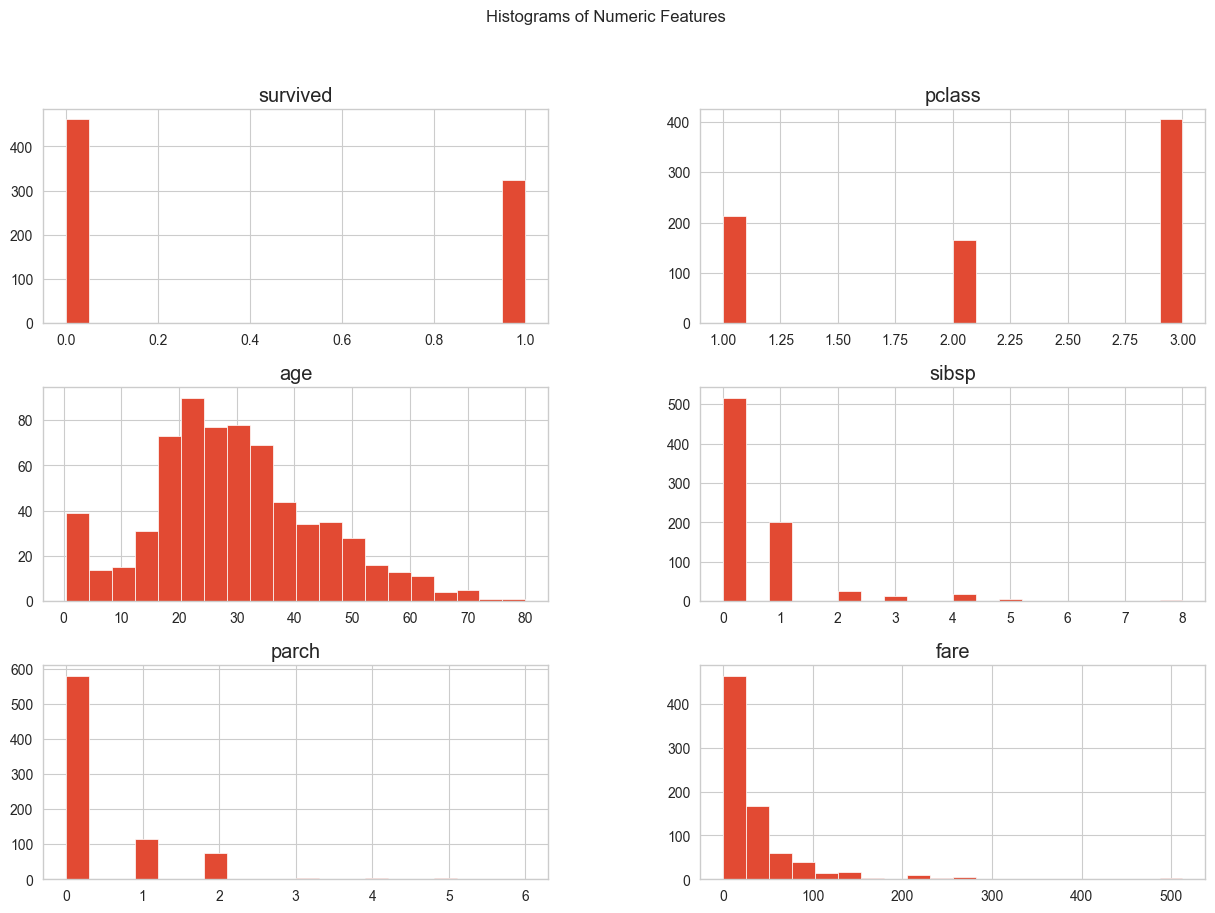

In [19]:

# -------------------------------
# 5. UNIVARIATE ANALYSIS
# -------------------------------
# Numeric columns - histograms
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms of Numeric Features')
plt.show()


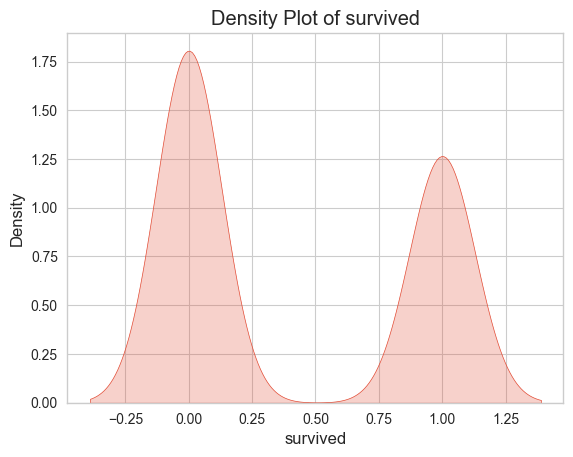

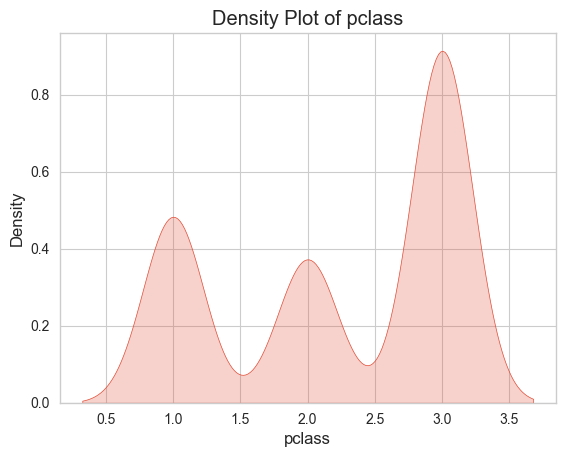

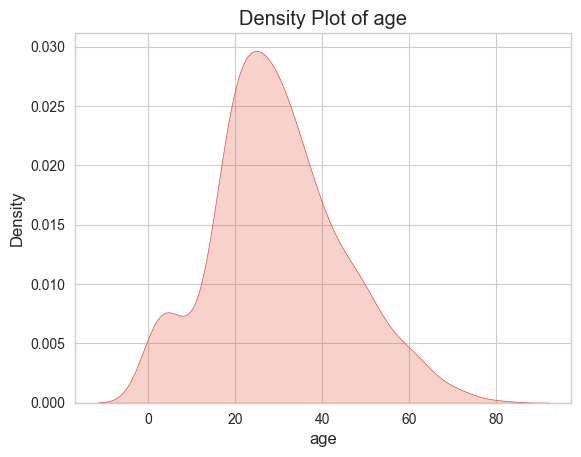

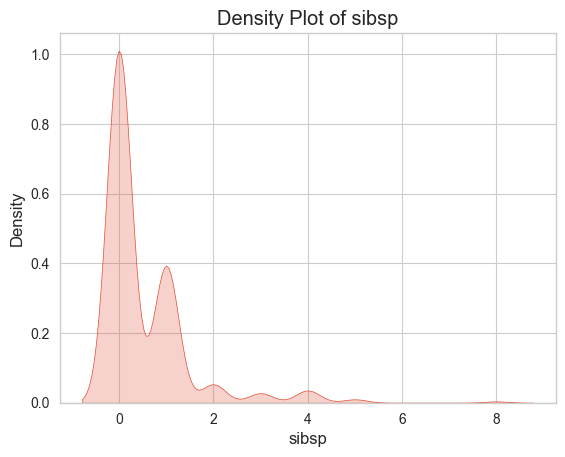

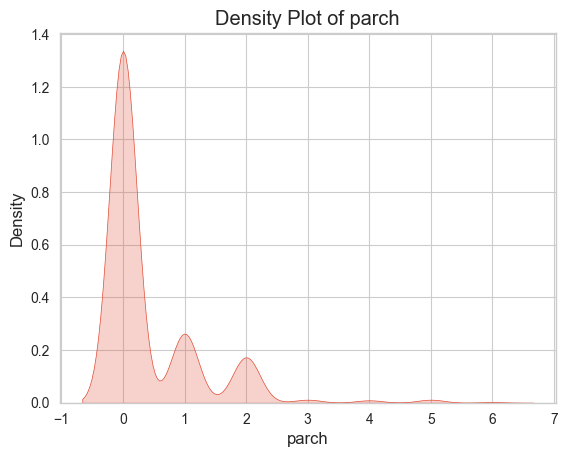

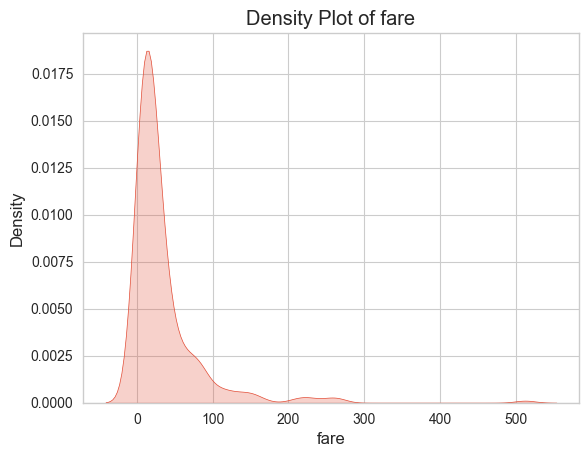

In [22]:

# Density plots
for col in numeric_cols:
    sns.kdeplot(df[col].dropna(), fill=True)
    plt.title(f'Density Plot of {col}')
    plt.show()


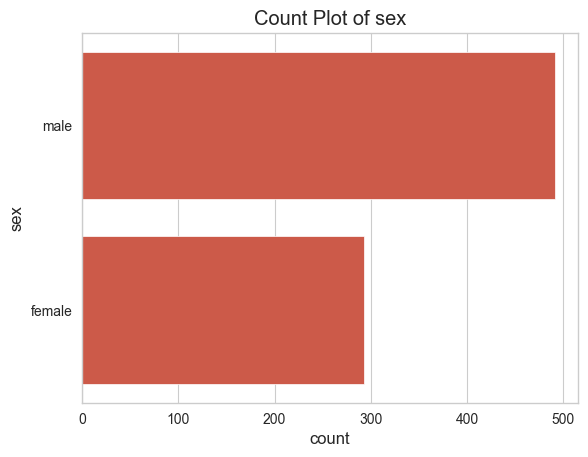

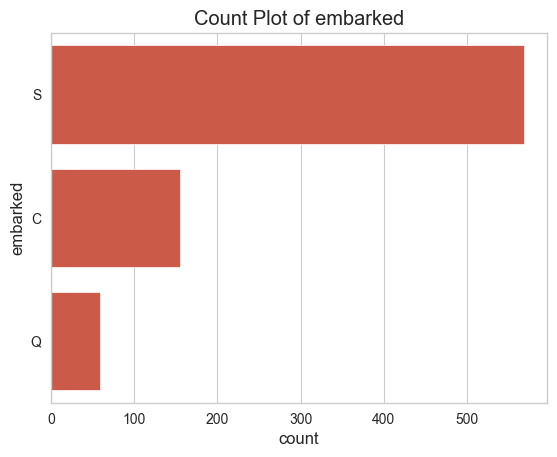

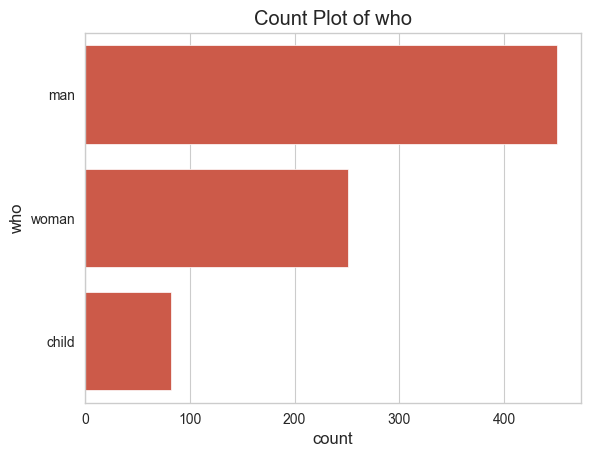

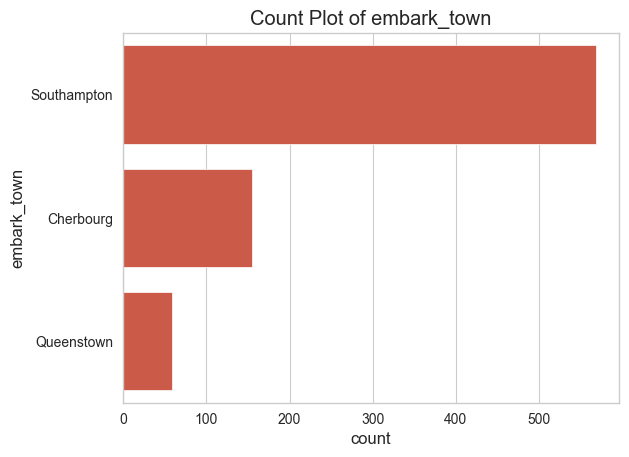

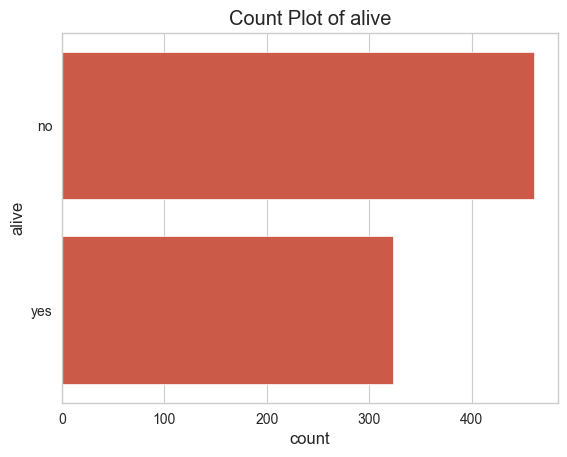

In [23]:

# Categorical columns - count plots
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.show()


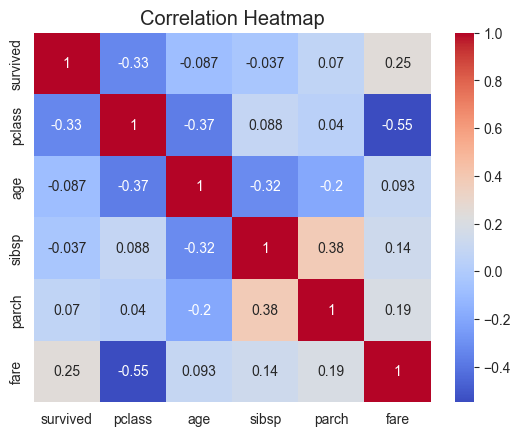

In [24]:

# -------------------------------
# 6. BIVARIATE / MULTIVARIATE ANALYSIS
# -------------------------------
# Correlation heatmap
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


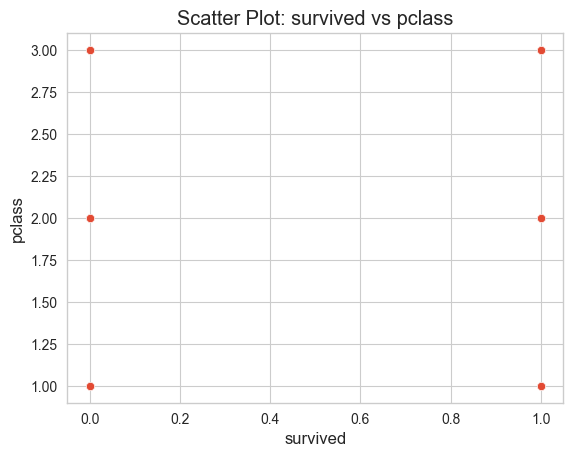

In [25]:

# Scatter plots of selected numeric columns
if len(numeric_cols) >= 2:
    sns.scatterplot(x=numeric_cols[0], y=numeric_cols[1], data=df)
    plt.title(f'Scatter Plot: {numeric_cols[0]} vs {numeric_cols[1]}')
    plt.show()


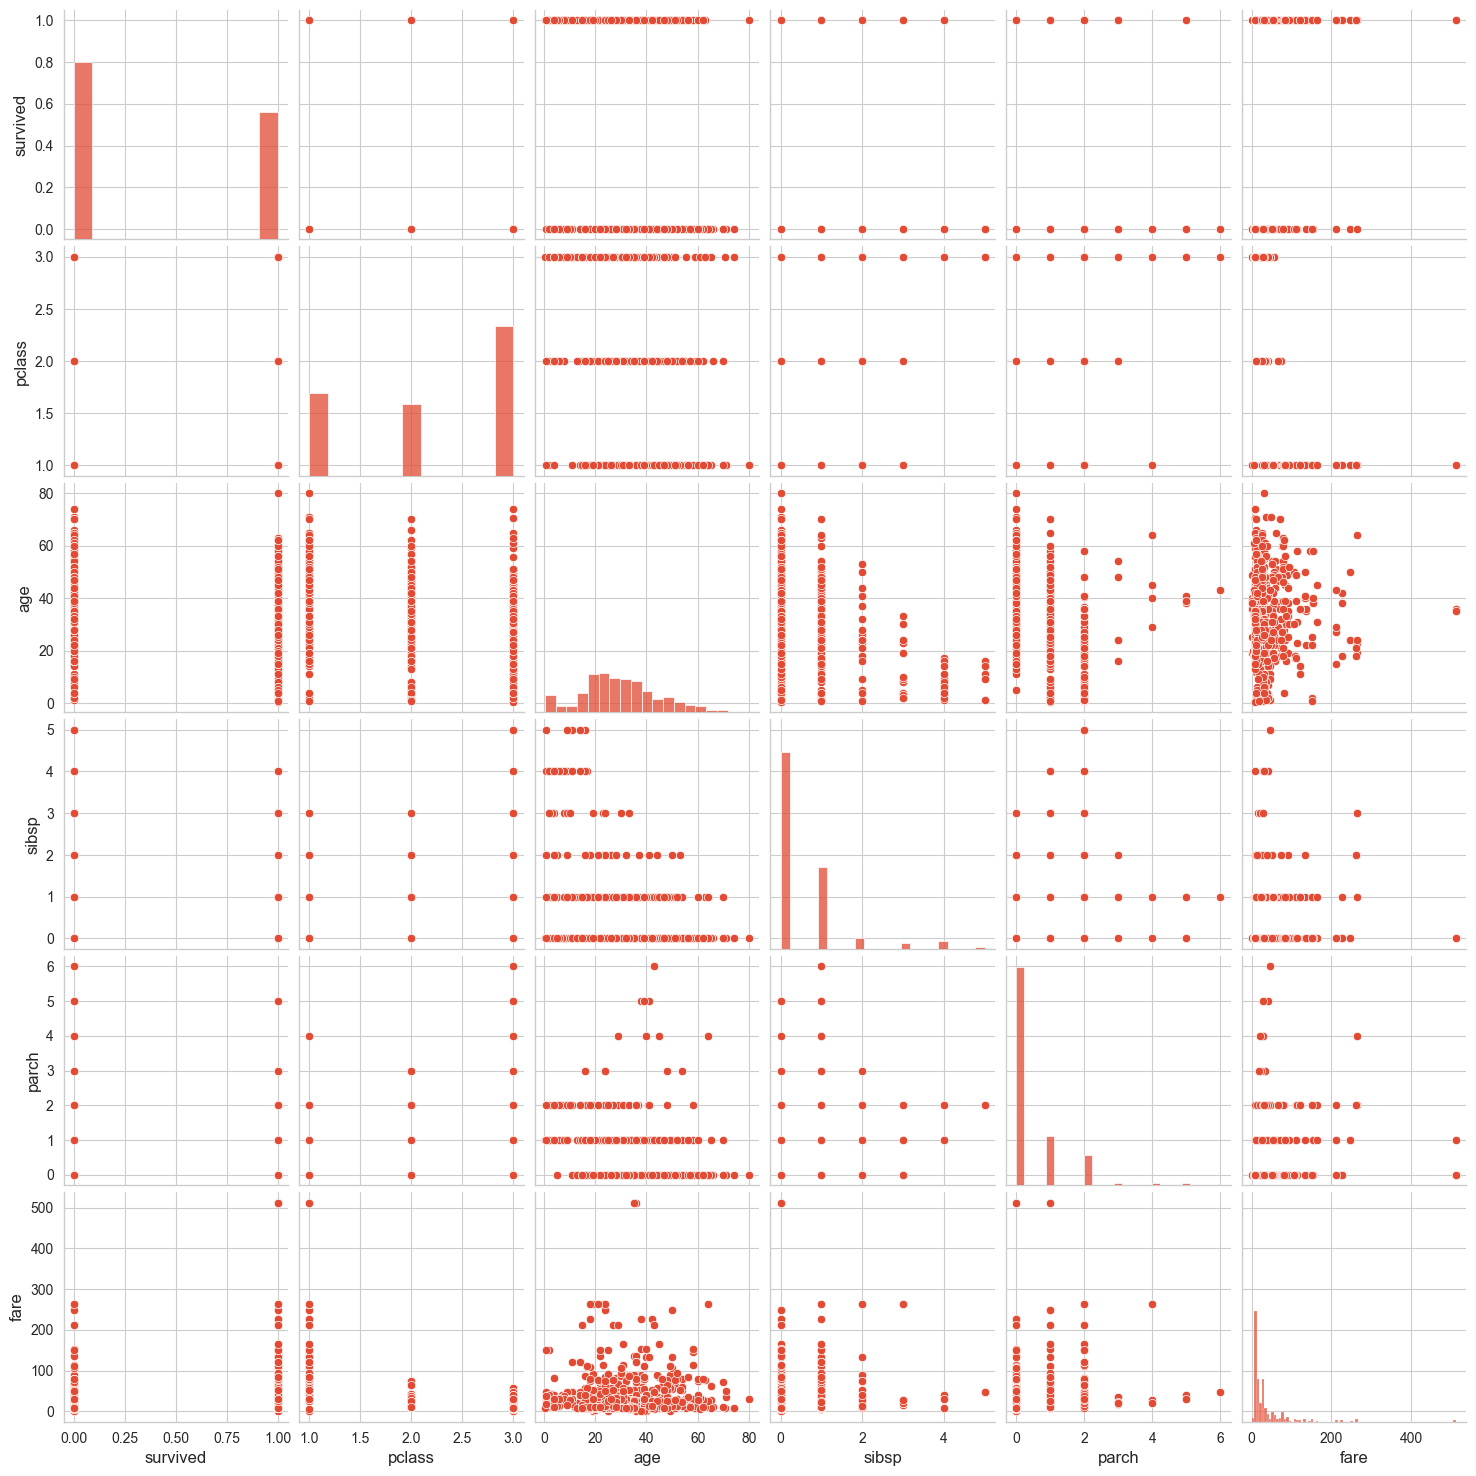

In [28]:

# Pairplot for numeric columns
sns.pairplot(df[numeric_cols].dropna())
plt.show()


,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.740614,2.116041,27.946289,0.648464,0.672355,46.147313
male,0.215886,2.319756,31.035948,0.448065,0.262729,27.887660


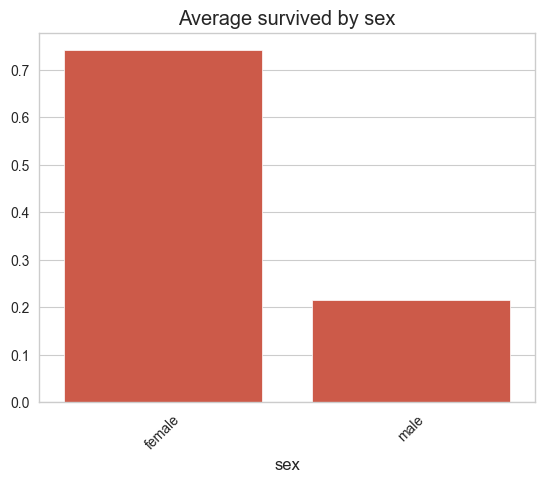

In [29]:

# -------------------------------
# 7. GROUPING / AGGREGATION EXAMPLES
# -------------------------------
# Example: mean of numeric columns grouped by a categorical column
if len(categorical_cols) > 0:
    group_col = categorical_cols[0]
    agg_df = df.groupby(group_col)[numeric_cols].mean()
    display(agg_df)

    # Bar plot of first numeric column by group
    sns.barplot(x=agg_df.index, y=agg_df[numeric_cols[0]].values)
    plt.title(f'Average {numeric_cols[0]} by {group_col}')
    plt.xticks(rotation=45)
    plt.show()
